## Seq2seq 和注意力机制

### 介绍

在循环神经网络之前，人们基于统计平行语料间的共现信息进行翻译，但是泛化能力较差。之后，基于循环神经网络的 Seq2seq 能够实现更高性能的翻译系统，而添加 attention 机制又使当时的翻译系统更进一步，本实验主要介绍这两类结构，主要包括以下知识点：

#### 知识点

- Seq2seq
- attention 机制
- 构建 Seq2seq + attention

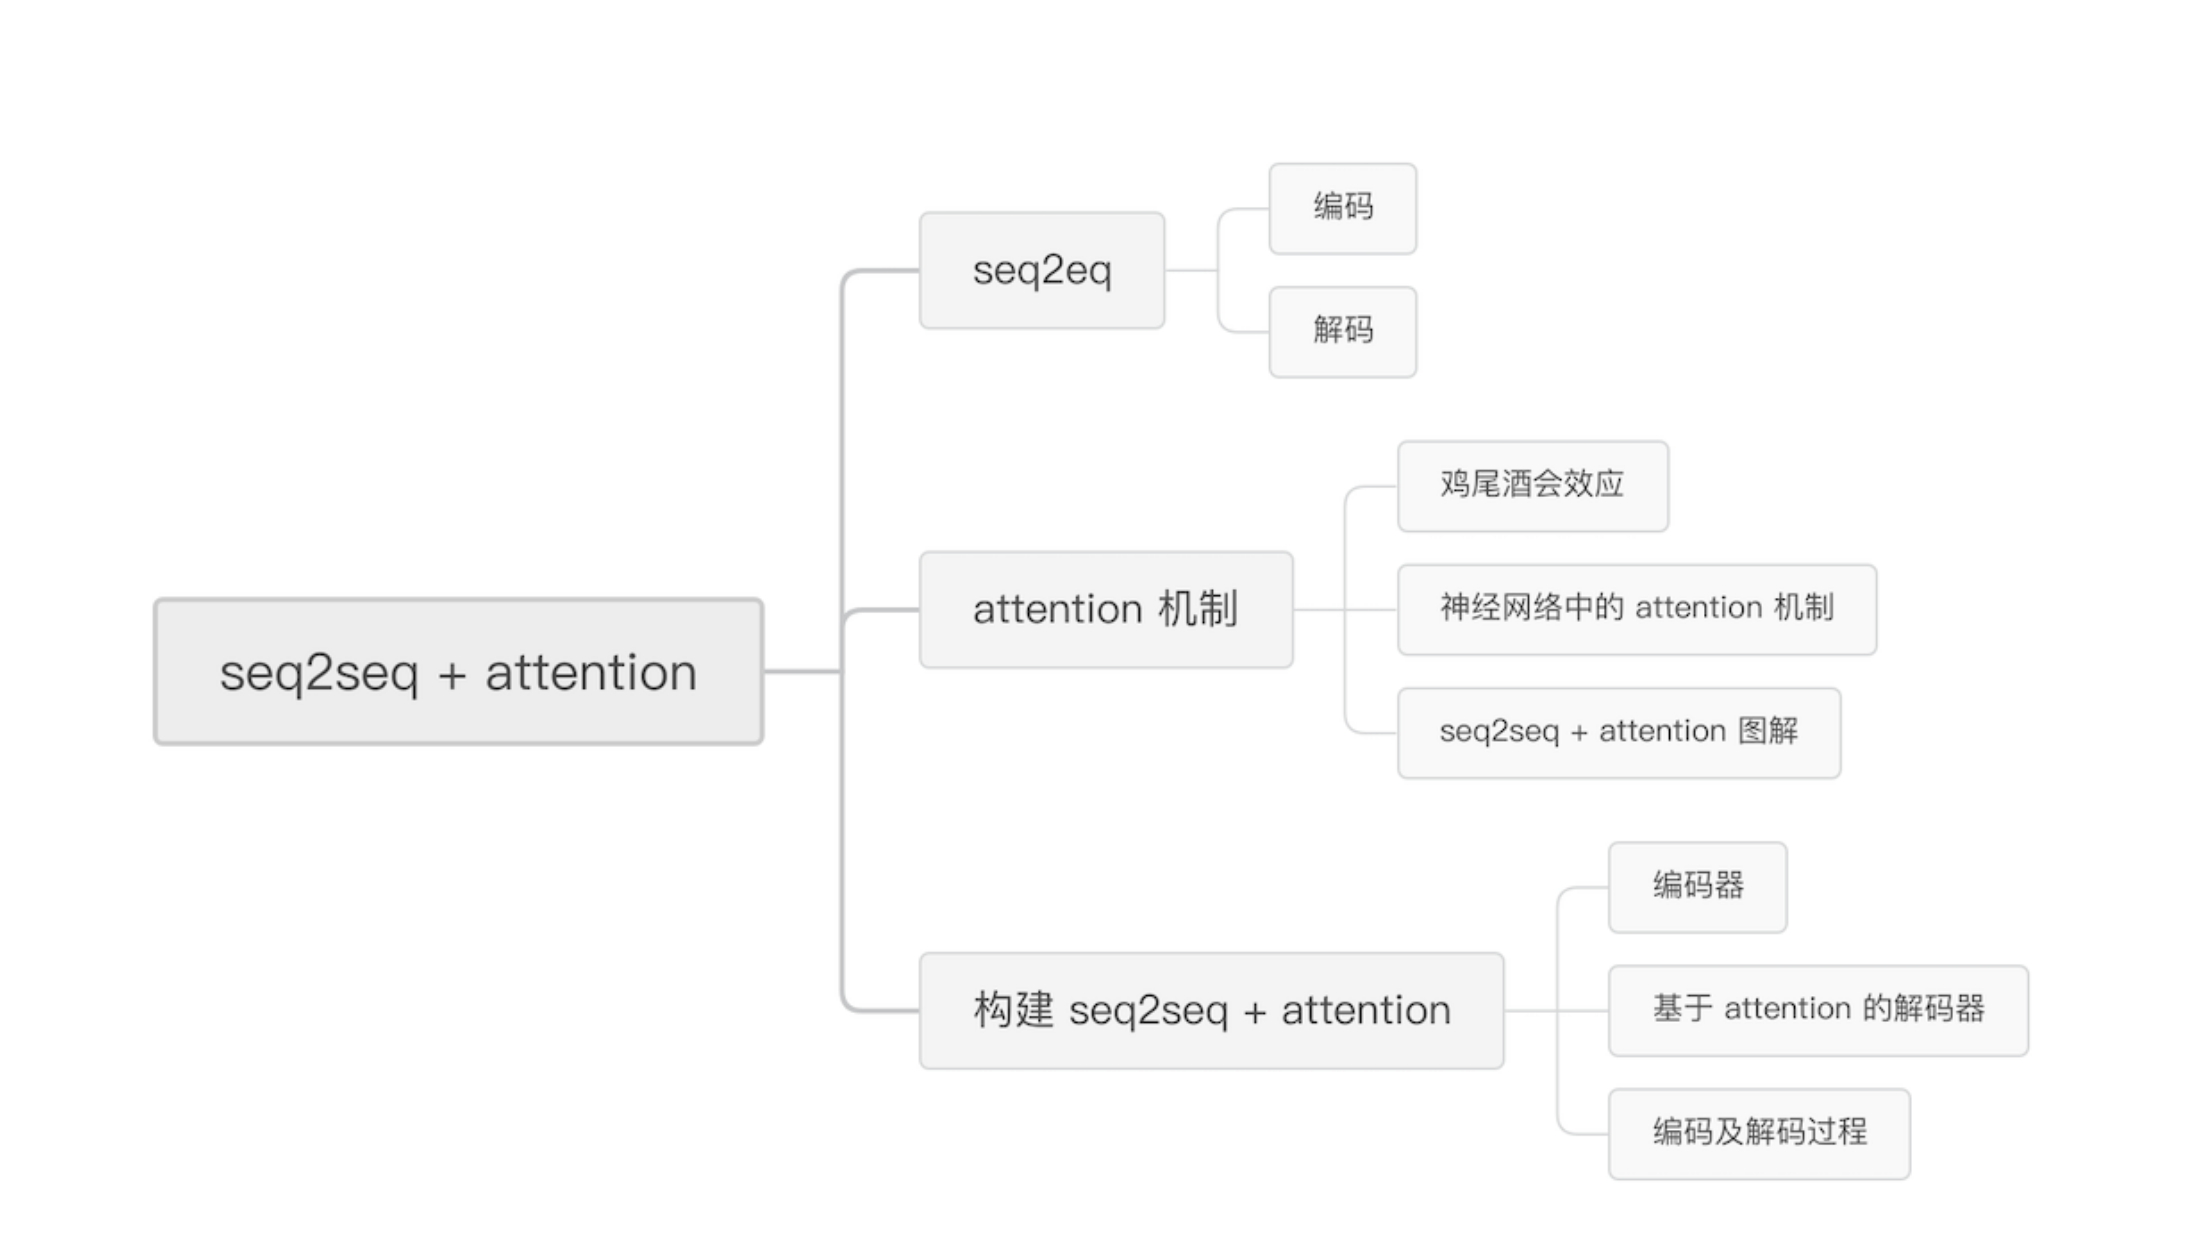

### Seq2seq

Seq2seq 是一种框架结构，它接受一个序列（单词、字母、图像特征等）并输出另一个序列，由<font color=#0099ff>编码和解码</font>两部分构成。如在机器翻译任务中，一个序列指的是一系列的词，一个接一个地被处理编码，同样，输出的也是一系列单词，一个接一个地进行解码。

具体地，编码器处理输入序列中的每一项，将捕获的信息编译成一个向量（对输入序列的编码）。在处理完整个输入序列后，编码器将编码后的信息发送给解码器，解码器开始基于<font color=#0099ff>此信息</font>逐项生成输出序列。

如下图所示，< s > i am fat < e > 为源语句（< s > 、 < e > 分别为首尾符），输入以循环神经网络为基本结构的编码器中，最后一步的 hidden state 可当作整个<font color=#0099ff>文本的表征</font>，因为基于循环神经网络的记忆性质，它“见过了”整个文本。而此 hidden state 则作为解码器(也是循环神经网络结构)的 init hidden state，与初始标志符 < s > 一同作为第一步的输出，预测第一步的单词，再将第一步预测的单词作为第二步的输入，依次类推，直至解码至结束符 < e > 或者达到最长长度。

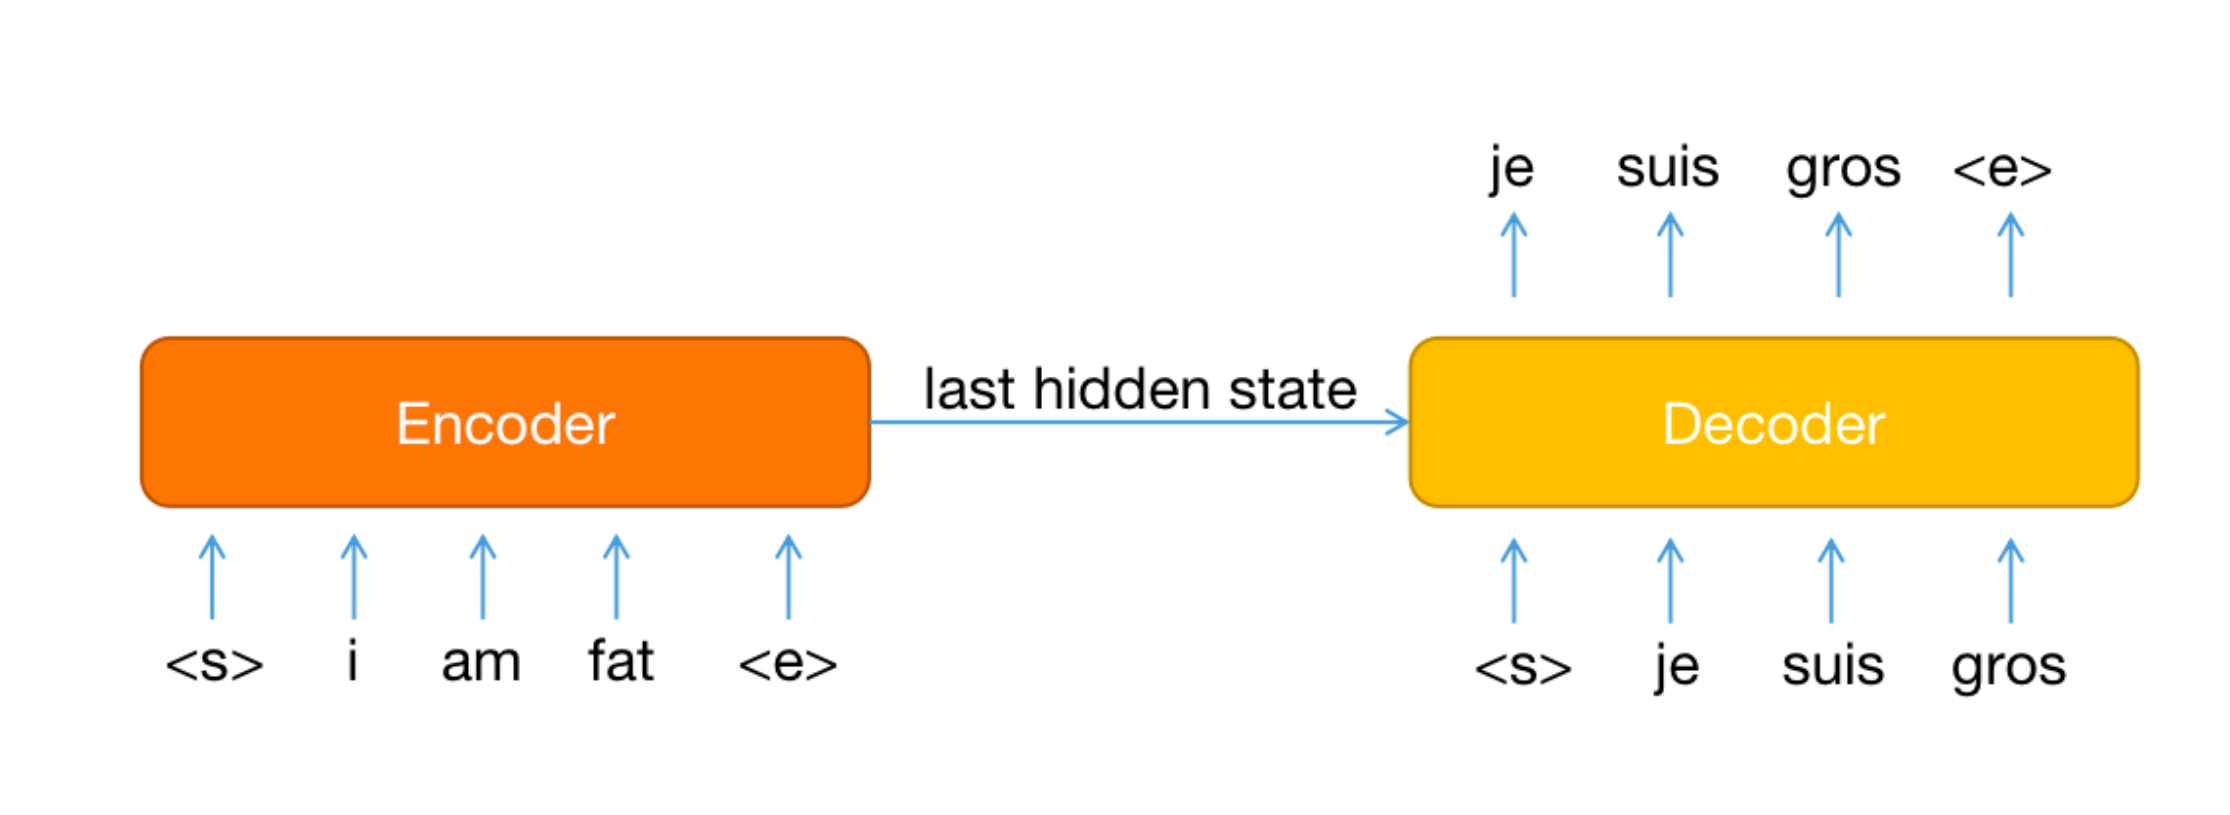

对比之前藏头诗的实验，其实机器翻译模型与写诗的语言模型比较类似，例如 Decoder 部分与语言模型基本相同。对于机器翻译的 Decoder，init hidden state 是源语句进行编码之后的表征，而对于写诗系统而言，我们可以选择一句带强烈文本的诗进行循环网络计算，最后的输出作为 Decoder 的 init hidden state，两者均为<font color=#0099ff>有条件的语言模型</font>，即基于特定 init hidden state 生成之后的文本。

当然，这种简单结构有些问题，尤其是循环神经网络中存在<font color=#0099ff>长距离信息难以捕捉</font>的问题，对于较长的句子，我们很难寄希望于将输入的序列转化为定长的向量而保存所有的有效信息，所以随着所需翻译句子的长度的增加，这种结构在机器翻译中的效果会显著下降。

### attention 机制

对于人类而言，<font color=#0099ff>鸡尾酒会效应</font>是指人的一种听力选择能力。在这种情况下，注意力集中在某一个人的谈话之中而忽略背景中其他的对话或噪音。该效应揭示了人类听觉系统中令人惊奇的能力，即我们可以在噪声中谈话。这其实是人类身上的 attention 机制。

attention 的概念源于认知科学，指的是人类会<font color=#0099ff>有选择性地关注一部分信息而忽略另一部分信息</font>，也就是说，对于不同的信息具有不同程度的关注度。这种机制使得人类能够最大化地利用有限的视觉资源，并且获取最关键的信息。那么将此机制迁移应用至人工神经网络，相当于，<font color=#0099ff>用尽量简单的模型获取尽量关键的特征</font>。

2014 年，谷歌大脑团队应用结合了注意力机制的卷积神经网络在图像分类以及物体检测任务上取得了巨大成功。随后的 2015 年，在自然语言处理领域，结合了注意力机制的 Seq2seq 结构也在机器翻译任务上取得了前所未有的成绩。

从翻译的角度解释注意力机制，即在一个个单词地翻译出目标语的时候，<font color=#0099ff>有侧重点地对照</font>源文本中的关键信息，从而进行高效翻译。

简单地说，在 Seq2seq 结构中做机器翻译的任务，相当于让模型<font color=#0099ff>“看过”</font>源语句，再基于<font color=#0099ff>“印象”</font>（last hidden state）进行翻译，对于长句，<font color=#0099ff>“记忆能力”</font>不足，自然难以有效翻译。而 Seq2seq + attention 结构作了什么变化呢？同样让模型<font color=#0099ff>“看过”</font>源语句，同时保留所有的源语句输出，即所有步的输出，在编码过程中<font color=#0099ff>有侧重地</font>参考源句子所有步的信息，再翻译出当前步的单词，提高翻译准确性。

一种典型的 Seq2seq+attention 模型结构如下图所示：

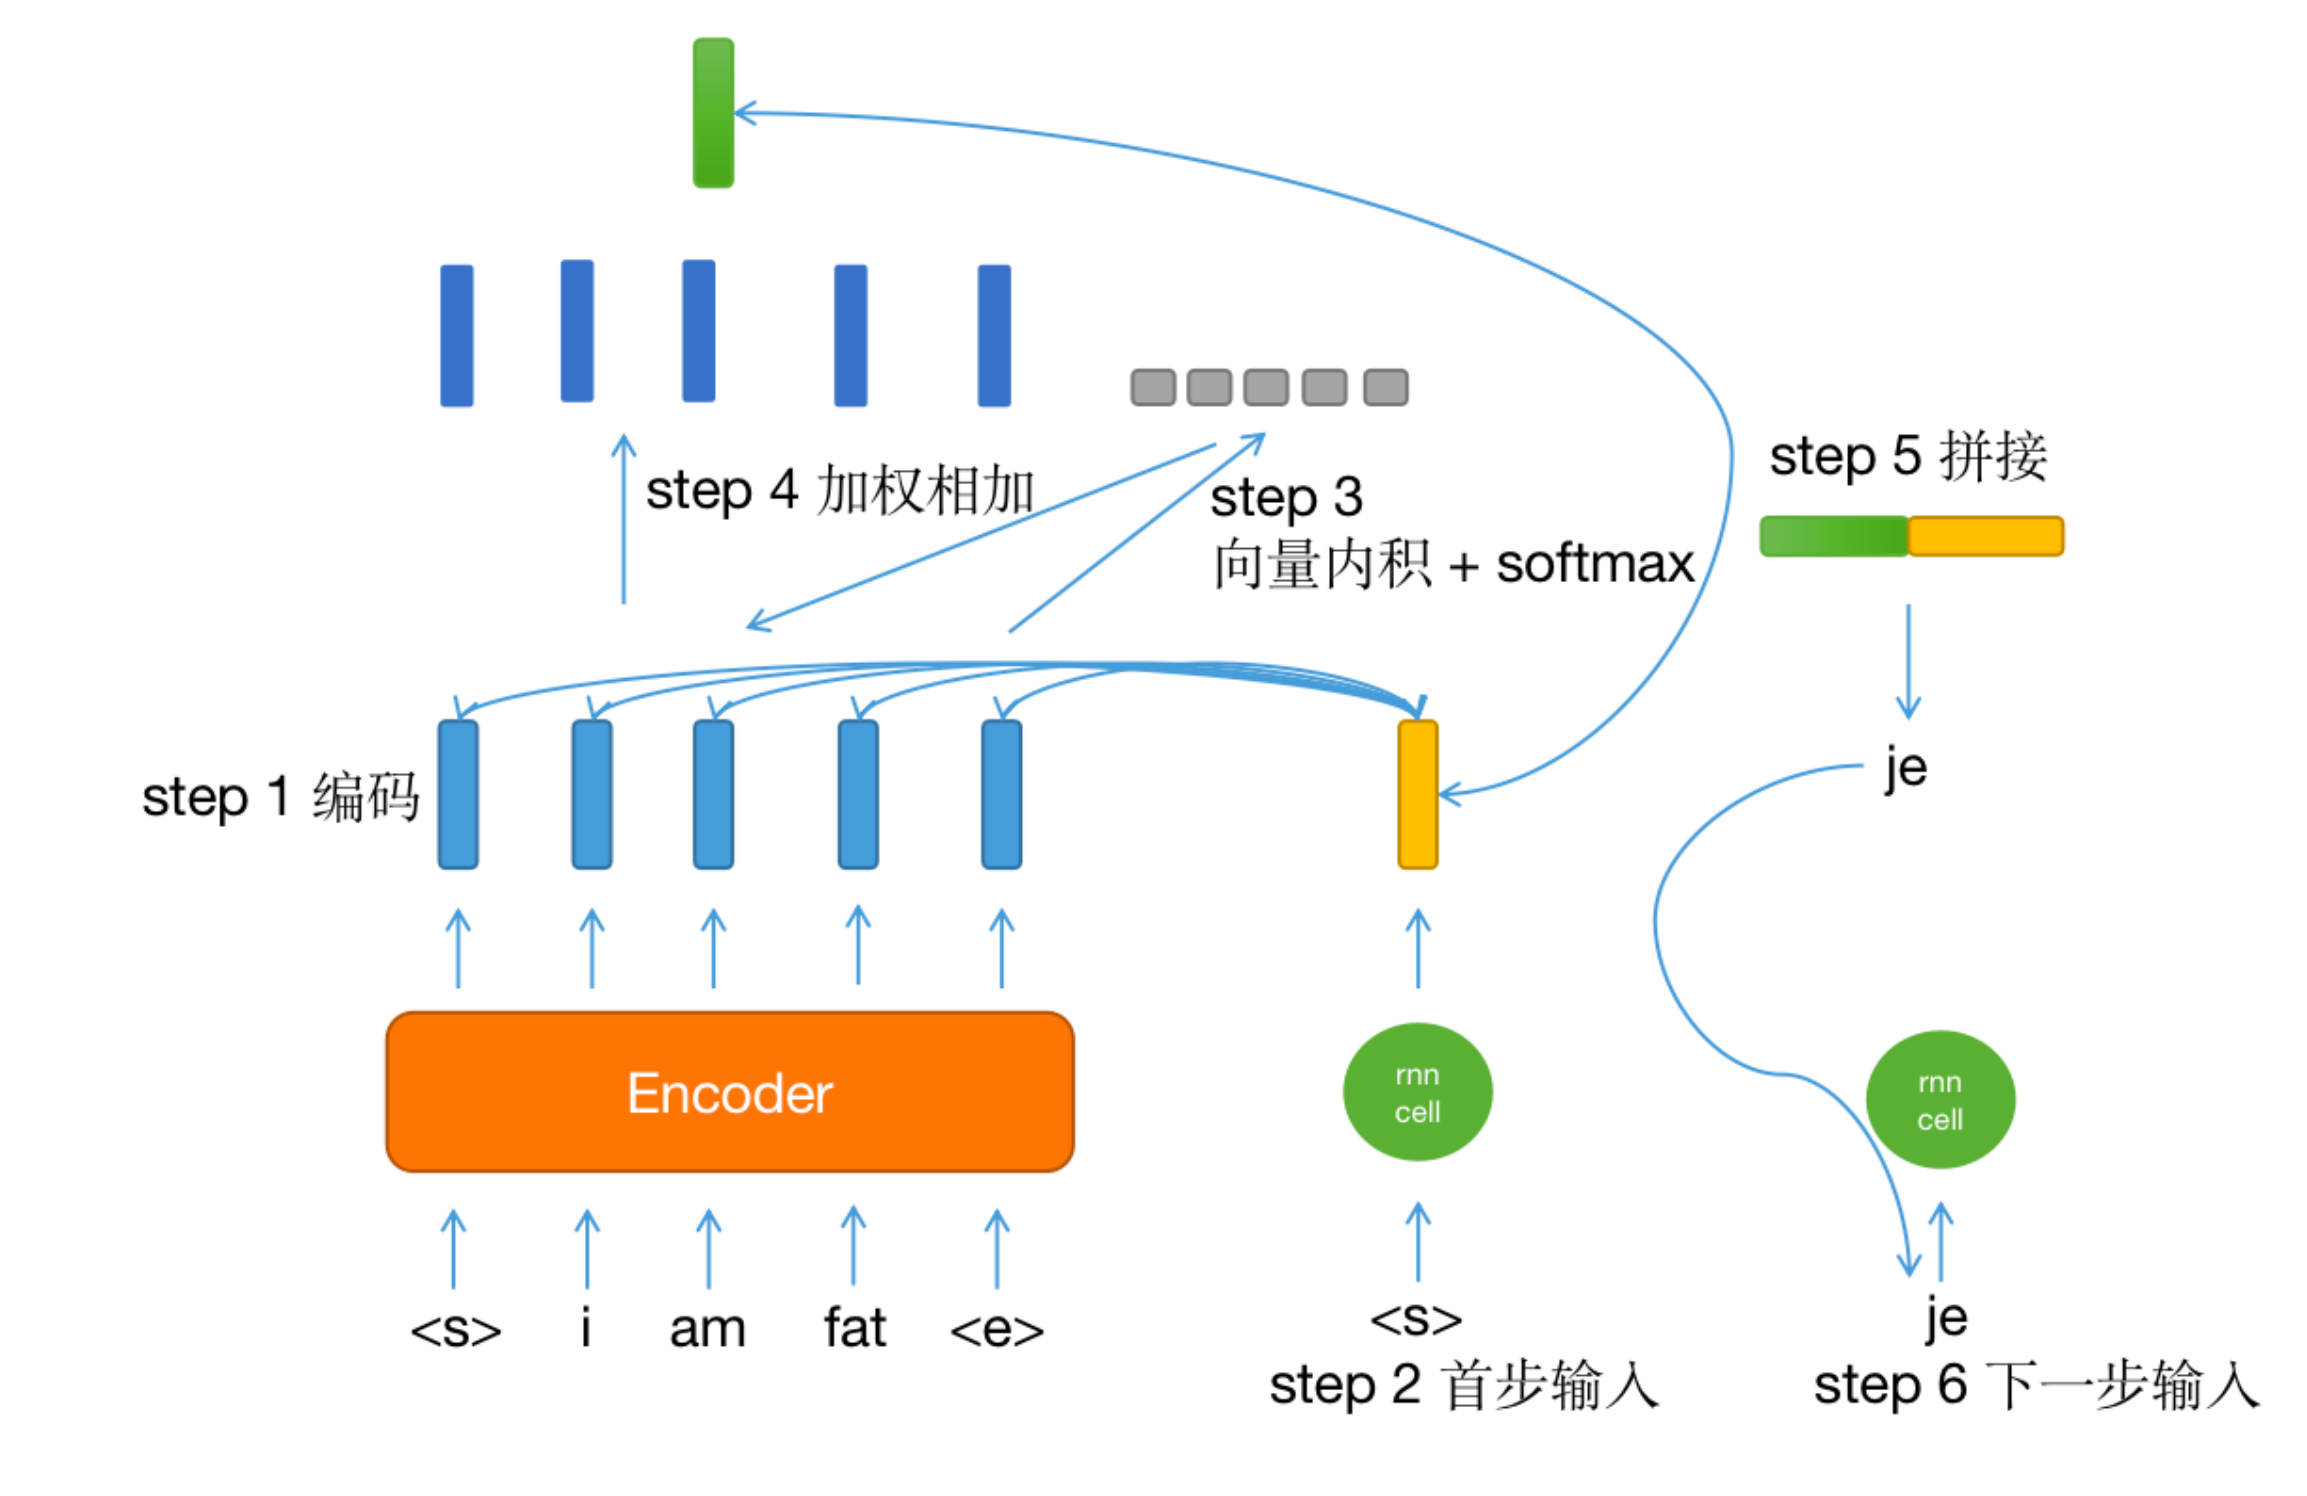

- step 1: 源语句 < s > i am fat < e > 输入 Encoder 进行编码，每一步都得到对应输出 encoder outputs（图中浅蓝色长条）；
- step 2: 进入解码阶段，首步输入 < s >，得到相应表征 hidden state（图中的黄色长条）；
- step 3: 将 hidden state 分别与 encoder outputs 进行内积计算，并通过 softmax 转换为概率形式，这里称为 weights，此概率代表了 hidden state 与各 encoder outputs 间的相关程度；
- step 4: 将 weights 分别与 encoder outputs 相乘再相加，得到加权相加后的向量表征（图中的绿色长条），称为 weighted context;
- step 5: 将 weighted context 和 hidden state 进行拼接，再映射到词典大小的维度预测下一个单词；
- step 6: 将下一个单词输入解码单元，重复 step 2-step 5，直至达到最长长度或者预测出终止符 < e > 。

### 构建 Seq2seq + attention

接下来，我们基于以上模型结构，应用 PyTorch 框架进行 Seq2seq+attention 的模型构建。

首先构建以 GRU 为基础的编码器：

<i class="fa fa-arrow-circle-down" aria-hidden="true"> 教学代码：</i>

In [ ]:
import torch.nn as nn


class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size  # 隐层大小
        self.embedding = nn.Embedding(input_size, hidden_size)  # 词向量层
        self.gru = nn.GRU(hidden_size, hidden_size)  # GRU 层

    def forward(self, input, hidden):
        # 输入的 batch_size 为 1，且每次输入一个单词
        embedded = self.embedding(input).view(1, 1, -1)  # 词向量计算，注意输出后的维度变化
        output, hidden = self.gru(embedded, hidden)  # GRU 层计算
        return output, hidden

    def initHidden(self):  # 初始化隐状态
        return torch.zeros(1, 1, self.hidden_size)

<i class="fa fa-arrow-circle-down" aria-hidden="true"> 动手练习：</i>

接下来构建基于 GRU 的解码器，并且加入 attention 机制：

In [ ]:
import torch.nn.functional as F


class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size  # 隐层大小
        self.output_size = output_size  # 输出层大小，实际上为目标语言的词典大小

        self.embedding = nn.Embedding(
            self.output_size, self.hidden_size)  # 词向量层
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)  # GRU 层
        self.out = nn.Linear(self.hidden_size*2, self.output_size)  # 输出层

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)  # 输入当前单词的词向量计算
        embedded = F.relu(embedded)  # 激活函数 Relu
        output, hidden = self.gru(embedded, hidden)  # GRU 运算

        # 注意力运算，由 encoder_outputs 和 hidden 进行内积计算
        attn_weights = F.softmax(torch.bmm(encoder_outputs.unsqueeze(
            0), hidden.view(1, self.hidden_size, -1)), dim=1)
        # 添加注意力机制的源文信息
        weighted_context = torch.matmul(
            attn_weights.squeeze(2), encoder_outputs)
        # 拼接当前信息以及添加注意力机制的源文信息
        output = torch.cat([output.squeeze(0), weighted_context], dim=1)
        # 对输出进行 softmax 计算
        output = F.softmax(self.out(output), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):  # 初始化隐状态
        return torch.zeros(1, 1, self.hidden_size)

在构建好编码器及解码器之后，初始化两者：

In [ ]:
INPUT_SIZE = 1000  # 输入维度，实际上为源语言的词典大小
HIDDEN_SIZE = 60  # 隐层大小
OUTPUT_SIZE = 1000  # 输出维度，实际上为目标语言的词典大小

# 初始化编码器及解码器
my_encoder = EncoderRNN(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE)
my_decoder = AttnDecoderRNN(hidden_size=HIDDEN_SIZE, output_size=OUTPUT_SIZE)
my_encoder,my_decoder

输入假设的源语句，进行编码过程：

In [ ]:
import torch

# 假设已转换为 id 的输入源语句如下
input = torch.tensor([[0], [4], [3], [1]])
# 初始化 encoder 隐状态
encoder_hidden = my_encoder.initHidden()
# 获取输入文本长度
input_length = input.size(0)
# 用于存在 encoder 每一步的输出
encoder_outputs = torch.zeros(input_length, my_encoder.hidden_size)
# 每一步进行 rnn 运算，并将结果保存，得到 encoder_outputs
for i in range(input_length):
    encoder_output, encoder_hidden = my_encoder(input[i], encoder_hidden)
    encoder_outputs[i] = encoder_output[0, 0]
encoder_outputs.shape

输出大小为 [input_length, hidden_size]。

在得到编码器输出 `encoder_outputs` 后，进行解码：

In [ ]:
# decoder 首输入为 "<s>"，假设其对应 id 为 0
decoder_input = torch.tensor([[0]])
# encoder 隐状态传给 decoder，作为其初始隐状态
decoder_hidden = encoder_hidden
# 进行一步编码过程
decoder_output, decoder_hidden, decoder_attention = my_decoder(
    decoder_input, decoder_hidden, encoder_outputs)
decoder_output.shape  # [1,output_size], 在输出结果中选概率最高者作为编码出的单词
# TODO：重复上一步进行编码

最终编码输出是在 output_size 维中选取概率最大的单词作为所编码出的词汇，接着将其作为下一步输入，再进入下一步的编码过程。

当然，以上过程其实是训练完成编码器及解码器之后，利用模型进行翻译的流程。而要训练整个模型，则需要添加损失器、优化器等要件，还涉及到基于多大的概率进行<font color=#0099ff>教师模式</font>的训练，在下一实验中会具体讲解。

### 实验总结

事实上，基于 Seq2seq + attention 的框架可以应对多种任务，比如文本摘要、看图说话等，只要是输入源和输出源均能表示成序列形式即可。另外，注意力机制存在多种计算方式，只要最终能够获取基于不同权重组合而成的源语句信息即可。

本实验的主要知识点如下：

- Seq2seq 方法
- attention 机制
- 构建 Seq2seq + attention

在下一实验中，我们将用实例演示英法翻译系统，并基于与本实验不同的注意力机制进行相关解码计算。